In [729]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import librosa

In [56]:
from math_utils import *

In [19]:
human_dict = {200: 1., 400: 1., 600: 1.1, 800: 1.4,
            1000: 1.9, 2000: 3.2, 4000: 15.9, 8000: 68.5}

In [20]:
human_df = pd.DataFrame.from_dict(human_dict, orient='index', columns = ['dF'])

In [21]:
human_df

,dF
200,1.0
400,1.0
600,1.1
800,1.4
1000,1.9
2000,3.2
4000,15.9
8000,68.5


In [22]:
human_df['dF/F'] = human_df['dF']/human_df.index

In [23]:
human_df

,dF,dF/F
200,1.0,0.005000
400,1.0,0.002500
600,1.1,0.001833
800,1.4,0.001750
1000,1.9,0.001900
2000,3.2,0.001600
4000,15.9,0.003975
8000,68.5,0.008563


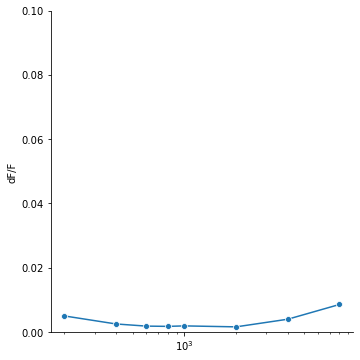

In [39]:
sns.relplot(x=human_df.index, y=human_df['dF/F'], kind='line', marker='o')
plt.ylim([0, 0.1])
plt.xscale('log')

In [41]:
starling_dict = {400:0.023, 800: 0.0125, 1200: 0.007, 1600: 0.006, 3200:0.006, 6400: 0.006, 12800: 0.018}

In [42]:
starling_df = pd.DataFrame.from_dict(starling_dict, orient='index', columns = ['dF/F'])

In [46]:
combined_df = pd.DataFrame.from_dict(starling_dict, orient='index', columns = ['starling'])
combined_df = pd.concat([combined_df, human_df['dF/F']], axis=1)

In [48]:
combined_df.columns = ['starling', 'human']

In [50]:
combined_df = combined_df.reset_index()

In [54]:
combined_df.rename(columns={'index':'freq'}, inplace=True)

In [55]:
combined_df

,freq,starling,human
0,200,NaN,0.005000
1,400,0.0230,0.002500
2,600,NaN,0.001833
3,800,0.0125,0.001750
4,1000,NaN,0.001900
5,1200,0.0070,NaN
6,1600,0.0060,NaN
7,2000,NaN,0.001600
8,3200,0.0060,NaN
9,4000,NaN,0.003975


In [57]:
combined_df['mel'] = combined_df['freq'].apply(hz2mel) 

In [58]:
combined_df

,freq,starling,human,mel
0,200,NaN,0.005000,283.229898
1,400,0.0230,0.002500,509.384604
2,600,NaN,0.001833,697.653585
3,800,0.0125,0.001750,858.927403
4,1000,NaN,0.001900,999.985537
5,1200,0.0070,NaN,1125.336181
6,1600,0.0060,NaN,1340.654321
7,2000,NaN,0.001600,1521.359554
8,3200,0.0060,NaN,1935.783241
9,4000,NaN,0.003975,2146.064528


In [65]:
combined_df = combined_df.melt(['freq', 'mel'], ['starling', 'human'], var_name='species', value_name='dF/F').dropna()

In [124]:
combined_df = combined_df.reset_index(drop=True)

In [72]:
combined_df['dF'] = combined_df['freq']*combined_df['dF/F']

In [85]:
combined_df

,freq,mel,species,dF/F,dF
1,400,509.384604,starling,0.023000,9.2
3,800,858.927403,starling,0.012500,10.0
5,1200,1125.336181,starling,0.007000,8.4
6,1600,1340.654321,starling,0.006000,9.6
8,3200,1935.783241,starling,0.006000,19.2
10,6400,2610.986001,starling,0.006000,38.4
12,12800,3335.186715,starling,0.018000,230.4
13,200,283.229898,human,0.005000,1.0
14,400,509.384604,human,0.002500,1.0
15,600,697.653585,human,0.001833,1.1


In [89]:
np.array([hz2mel(freq) for freq in (combined_df['freq']+combined_df['dF']).values]) - combined_df['mel'].values

array([ 9.38657107,  7.48836098,  4.97151899,  4.69418595,  5.5346664 ,
        6.07886862, 19.07174745,  1.2515206 ,  1.02407475,  0.95320724,
        1.05137067,  1.25887837,  1.33490591,  3.80616287,  8.83870934])

In [92]:
#dmel = hz2mel(df+f)-hz2mel(df)
combined_df['dmel'] = np.array([hz2mel(freq) for freq in (combined_df['freq']+combined_df['dF']).values]) \
- combined_df['mel'].values

In [94]:
combined_df['dmel/mel'] = combined_df['dmel']/combined_df['mel']

In [125]:
combined_df

,freq,mel,species,dF/F,dF,dmel,dmel/mel,star,dstar
0,400,509.384604,starling,0.023000,9.2,9.386571,0.018427,101.484332,1.870080
1,800,858.927403,starling,0.012500,10.0,7.488361,0.008718,171.123494,1.491901
2,1200,1125.336181,starling,0.007000,8.4,4.971519,0.004418,224.199925,0.990472
3,1600,1340.654321,starling,0.006000,9.6,4.694186,0.003501,267.097605,0.935219
4,3200,1935.783241,starling,0.006000,19.2,5.534666,0.002859,385.664715,1.102668
5,6400,2610.986001,starling,0.006000,38.4,6.078869,0.002328,520.184880,1.211089
6,12800,3335.186715,starling,0.018000,230.4,19.071747,0.005718,664.466872,3.799651
7,200,283.229898,human,0.005000,1.0,1.251521,0.004419,56.427691,0.249340
8,400,509.384604,human,0.002500,1.0,1.024075,0.002010,101.484332,0.204026
9,600,697.653585,human,0.001833,1.1,0.953207,0.001366,138.993026,0.189907


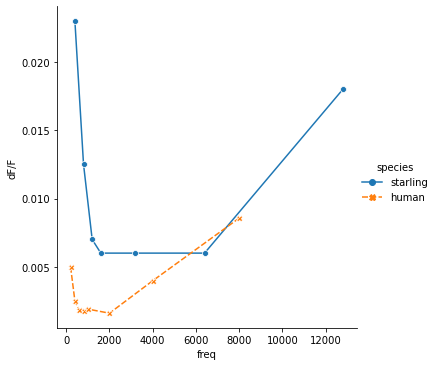

In [112]:
sns.relplot(x='freq', y='dF/F', style='species', hue='species', data = combined_df, kind='line', markers=True)
# plt.ylim([0, 0.1])
# plt.yscale('log')

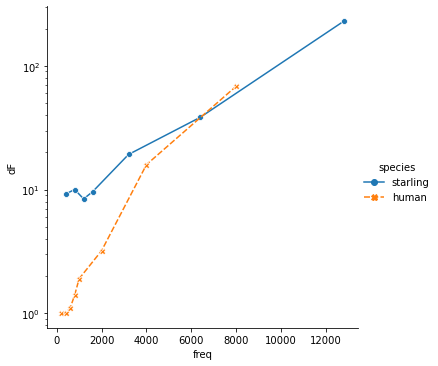

In [116]:
sns.relplot(x='freq', y='dF', style='species', hue='species', data = combined_df, kind='line', markers=True)
# plt.ylim([0, 0.1])
# plt.xscale('log')
plt.yscale('log')

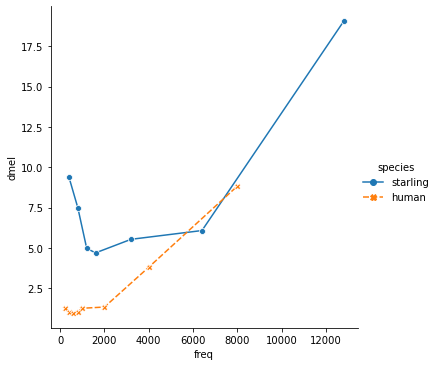

In [114]:
sns.relplot(x='freq', y='dmel', style='species', hue='species', data = combined_df, kind='line', markers=True)
# plt.ylim([0, 0.1])
# plt.xscale('log')

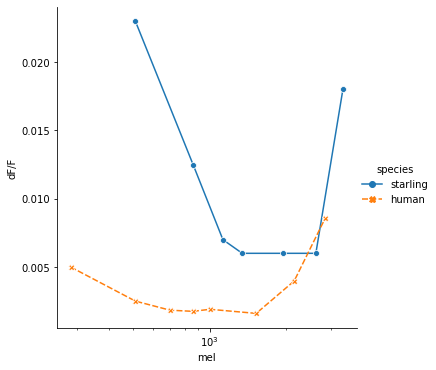

In [101]:
sns.relplot(x='mel', y='dF/F', style='species', hue='species', data = combined_df, kind='line', markers=True)
plt.xscale('log')

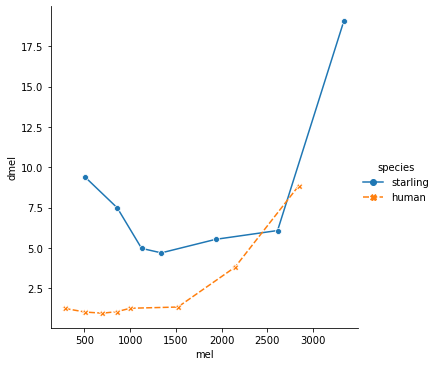

In [113]:
sns.relplot(x='mel', y='dmel', style='species', hue='species', data = combined_df, kind='line', markers=True)
# plt.xscale('log')

In [660]:
def hz2star(hz):
    star = 519*np.log10(hz/700+1)
    return star

In [661]:
10/10**0.2

6.309573444801932

In [662]:
combined_df['star'] = combined_df['freq'].apply(hz2star) 

In [663]:
combined_df['dstar'] = np.array([hz2star(freq) for freq in (combined_df['freq']+combined_df['dF']).values]) \
- combined_df['star'].values

In [664]:
combined_df['d'] = combined_df['dstar'].values.tolist()[:7]+combined_df['dmel'].values.tolist()[7:]

In [665]:
combined_df['scale'] = combined_df['star'].values.tolist()[:7]+combined_df['mel'].values.tolist()[7:]

In [666]:
combined_df

,freq,mel,species,dF/F,dF,dmel,dmel/mel,star,dstar,d,scale
0,400,509.384604,starling,0.023000,9.2,9.386571,0.018427,101.876921,1.877314,1.877314,101.876921
1,800,858.927403,starling,0.012500,10.0,7.488361,0.008718,171.785481,1.497672,1.497672,171.785481
2,1200,1125.336181,starling,0.007000,8.4,4.971519,0.004418,225.067236,0.994304,0.994304,225.067236
3,1600,1340.654321,starling,0.006000,9.6,4.694186,0.003501,268.130864,0.938837,0.938837,268.130864
4,3200,1935.783241,starling,0.006000,19.2,5.534666,0.002859,387.156648,1.106933,1.106933,387.156648
5,6400,2610.986001,starling,0.006000,38.4,6.078869,0.002328,522.197200,1.215774,1.215774,522.197200
6,12800,3335.186715,starling,0.018000,230.4,19.071747,0.005718,667.037343,3.814349,3.814349,667.037343
7,200,283.229898,human,0.005000,1.0,1.251521,0.004419,56.645980,0.250304,1.251521,283.229898
8,400,509.384604,human,0.002500,1.0,1.024075,0.002010,101.876921,0.204815,1.024075,509.384604
9,600,697.653585,human,0.001833,1.1,0.953207,0.001366,139.530717,0.190641,0.953207,697.653585


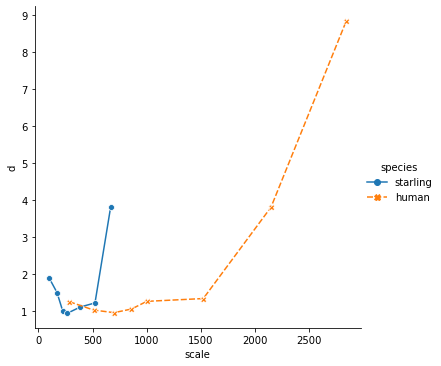

In [667]:
sns.relplot(x='scale', y='d', style='species', hue='species', data = combined_df, kind='line', markers=True)

## plot mel scale

In [73]:
freqs = np.arange(0, 15000, 20)

In [75]:
mels = [hz2mel(freq) for freq in freqs]

In [668]:
stars = [hz2star(freq) for freq in freqs]

In [730]:
mels_lib = [librosa.hz_to_mel(freq) for freq in freqs]

Text(0, 0.5, 'mel')

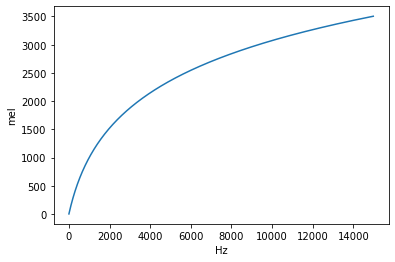

In [669]:
plt.plot(freqs, mels)
plt.xlabel('Hz')
plt.ylabel('mel')
# plt.xscale('log')

Text(0, 0.5, 'star')

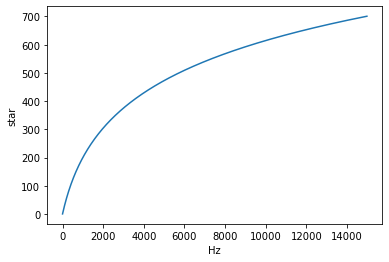

In [670]:
plt.plot(freqs, stars)
plt.xlabel('Hz')
plt.ylabel('star')
# plt.xscale('log')

Text(0, 0.5, 'mel')

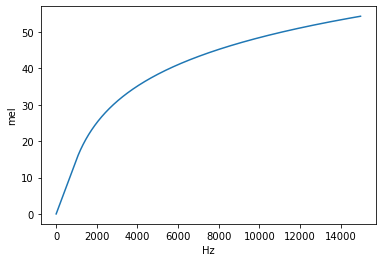

In [731]:
plt.plot(freqs, mels_lib)
plt.xlabel('Hz')
plt.ylabel('mel')